# Week 1: Introduction to Computation in Python

Name Theo Steiger

Date 09/05/24

## **Place all Library imports in this section**

<font color = blue>
At the top of every Python notebook in this course there will be a place to put "import" commands, generally pre-populated with the modules I know you will need.  You should always make sure to run this line of code every time you open up the notebook.  

If you find later that you want to add additional imports, please place those in this section as well.

In [2]:
import matplotlib.pyplot as plt
import math
import time
import random
import numpy as np

## **An Array of Particle Locations**

```
```

<font color = blue>

In this problem, we'll make a numpy array representing particle locations.  Suppose we have 100 particles to keep track of, and each has three spatial coordinates, so we could imagine generating an array with 100 entries, where each entry is itself an array of three values.  

Construct a numpy array called `particle_list` that spaces the particles out evenly along the line from the origin $\vec{r}_0 = 0\hat{x} + 0\hat{y} + 0\hat{z}$ to the location $\vec{r}_f = 1\hat{x} + 1\hat{y} + 1\hat{z}$.  

Note that there are many different ways to accomplish this -- you might want to spend some time with the documentation for the `numpy` functions `linspace` or `arrange` to find a good way.

Be careful to double check that your array has exactly the right number of entries, and has exactly the correct first and last entry.  (It's easy to be off by a small amount here).

What is the output of `particle_list[71][2]`?  Provide both the numerical answer, and describe the physical interpretation of this entry in words (as a discussion).

In [69]:
particle_list = np.zeros((100, 3))

# create a list of random lists of 3 positions (x, y, and z) for 100 particles
for i in range(100):
    one_particle = np.array([random.random(), random.random(), random.random()])
    particle_list[i] = one_particle

print(particle_list[71][2])

0.41468023483370386


## **Discussion**

<font color = black>
Physically the output of 'particle_list[71][2]' tells us that the 71st particle is at position 0.41468023483370386 on the z axis.

'''

## Making Graphs

```
```

<font color = blue>
Computational Methods generally produce results in the form of long lists of data; this is not terribly convenient for actually understanding anything, without the use of graphics.  The most common, basic tool for graphing in Python is the library matplotlib.  After importing this library, create an example of how to use this method below.  (You will of course first have to generate the data itself.)  Make sure your example incorporates the following elements, which will be very useful for you to be able to control in the future.
    
```
```

1) Your graph should display two sets of data on the same plot

2) It should include labels for the x- and y-axes

3) It should include a title

4) It should use a plot legend to distinguish between the two data sets

5) You should directly control the size of the plot.

6) One set of data should be displayed as a connected line, while the other as a set of points

7) You should directly control the colors of the two data sets.

8) You should also directly control the ranges of the x-axis and y-axis

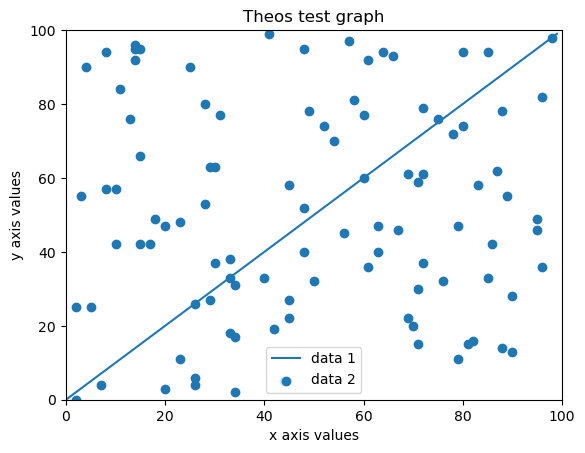

In [127]:
x1 = np.arange(0,100)
y1 = np.arange(0,100)
x2 = np.random.randint(0, high=100, size=(1,100), dtype=int)
y2 = np.random.randint(0, high=100, size=(1,100), dtype=int)

plt.ylabel('y axis values')
plt.xlabel('x axis values')
plt.title('Theos test graph')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot(x1, y1, label='data 1')
plt.scatter(x2, y2, label='data 2')
plt.legend()

plt.show()



## **The Heaviside Function**

<font color = blue>
The heaviside function is usually defined as

$$
H(x) = \left\{\begin{array}{rcl} 0 & \mbox{for} & x < 0 \\ 1 & \mbox{for} & x > 0 \end{array}\right.
$$

along with the special case $H(0) = \frac{1}{2}$.

### Simple Version

<font color = blue>
Use the "if" control structure to define a function H(x) such that

$$
H(x) = \left\{\begin{array}{rcl} 0 & \mbox{for} & x \le 0 \\ 1 & \mbox{for} & x > 0 \end{array}\right.
$$

Make sure to test your function out thoroughly.


### Full Version

<font color = blue>
Now use an "elif" structure to incorporate the special case $H(0) = \frac{1}{2}$.  (Again, test your function out thoroughly).

In [155]:
x = random.randint(-5, 5)

if x == 0:
    H = 1/2
elif x <= 0:
    H = 0
else:
    H = 1

print(H)

1


## The Sine Function

<font color = blue>
We know that we can approximate the sine function using the Taylor series

$$
\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} +\cdots
$$

### Truncated Taylor Series

<font color = blue>
    
Create a function that takes two inputs: a variable `x` and an integer `truncation`, and outputs the Taylor series approximation of sin(x), truncated after k terms.  To do this you can use the factorial function from the `math` library, and the `sum` function for adding up the elements of a list.  If necessary, look these functions up.  
    
```
```

In a discussion, spell out carefully what should happen if you set `truncation = 1` or `truncation = 2`, and confirm that this occurs.

In [268]:
# computes the taylor series for sin x up to the truncated term
def taylor(x, truncation):
    answer = 0
    if truncation <= 0: # truncation must be 0 or more
        print('error occurred')
        return 100
    else:
        for i in range(truncation): # add and subtracts respective terms to the taylor series up to term truncation
            j = i + 1
            if i % 2 == 1:
                answer = answer - (x**((j*2)-1))/(math.factorial((j*2)-1))
            else:
                answer = answer + (x**((j*2)-1))/(math.factorial((j*2)-1))
        return answer

taylor(.5, 5)

0.4794255386164159

### Error Message

<font color = blue>
    
Modify your function so that if the input value of `truncation` is not a positive integer, your function does two SEPARATE things: first, it **prints** an appropriate error message, and then it **returns** a value that cannot possibly be the output of sin(x) for any real value of x.  

Note: to do this you need a way to determine whether a variable is or is not an integer.  There are many possible solutions, but one way is to try "rounding" the value of `truncation` to the nearest integer, and see if the result is still the same as `truncation`.

### Accuracy

<font color = blue>
    
Now use your function to determine how large `truncation` must be in order for sin(0.5) to be accurate to 10 decimal places.  You must do this WITHOUT using any built-in sin function, external calculator, or table of values for comparison.  Explain briefly the principle behind your method as a **discussion**.

truncation must be at least 5 for the answer to be within 10 decimal places. The principle behind my method is basically to figure out whether we are on a odd or even term in the taylor series and depending on which we are at we either add or subtract from the answer that we already have.

## The Factorial Function

<font color = blue>
    
The factorial is a function generally defined for positive integers, so that

$$
k! = k \times (k-1) \times (k-2) \times \cdots (2) \times (1)
$$

Create your own function with a single input `k` which computes the factorial using a `for` loop.  Make sure your function will work for the special case $0! = 1$ as well.

In [297]:
# find the factorial of k
def fact(k):
    answer = 1
    if k == 0: # deal with special case k = 0
        answer = 1
    else:    
        for i in range(k):
            answer = answer * (i + 1)
    return answer

fact(11)

39916800

## Homework Grades

<font color = blue>
    
A common grading policy is to drop the lowest homework grade from a student's final grade.  What we want to do is construct a module that implements this policy, accepting as an input a list of grades, and outputing the final grade as a percentage.  You can assume that every homework assignment is scored out of 20 poitns, but do not assume anything about the number of assignmnts that have been turned in.  You must do this without using any pre-written "sorting" functions (such as `sort` or `min`), though you can use a built-in function to determine the length of the input list of grades.

### Minimum Value

<font color = blue>
Begin by creating a function that inputs a list of numbers, and outputs the lowest number in that list.

In [329]:
# find the minimum value in a list
def min(numlist):
    last = numlist[0]
    for item in numlist:
        if last > item:
            last = item
    return last

min([3, 2, 3, 4, 5])

3


2

### Final Grade

<font color = blue>
    
Now use this to create a function which generates the final homework percentage.  Check your function on the lists [15,9,20,0] and [15,20]  (You may assume the input list will have at least two grades in it).  Explain (as a discussion) what the answers should be, and why.

In [5]:
# generates the percentage HW grade of values in a list by dropping the lowest grade
def pct(numlist):
    last = numlist[0]
    for item in numlist:
        if last > item:
            last = item # finds the minimum value in a list
    index = 0
    for num in numlist:
        if num == last:
            last = -1
            numlist.pop(index) # takes the min value out of the list
        index += 1
    final = 0
    # compute average of the numbers in the remaining list
    for grade in numlist:
        final+=grade
    return final/len(numlist)

pct([15,20])
    

20.0

## Dot Products and Timing

### The Dot Product

<font color = blue>
Write a function that takes two arrays of equal length (think of them as vectors living in some high-dimensional space), and outputs the dot product of these vectors.  To do this, use the "sum" command".

In [79]:
# computes the dot product of 2 arrays of the same size
def dot(arr1, arr2):
    if len(arr1) != len(arr2):
        return "Error: The arrays must be of equal size."
    else:
        return sum(x*y for x, y in zip(arr1, arr2)) # sums the value of the product of each value in each array

dot([1, 2, 3], [4, 5, 6])

32

### Time Required for a Single Arithmetic Operation

<font color = blue>
    
The module `time` has a command `time` which outputs the current time.  This can be used to determine the time required to perform some calculation.  

Using this command (don't forget to import the module!), write a function that takes, as its argument an integer `n_size`, and returns the amount of time it took to compute the dot product of two vectors, each of length `n_size`.  (It doesn't really matter what specifically these vectors are, so you could use vectors where every component is equal to one, for example.)

With this function, create a list of the amount of time it takes to compute the dot product for vectors of lengths 10000, 20000, ..., 100000 (in steps of 10000.)  From this list, estimate the amount of time it takes your computer to perform a single arithmetic operation, and describe your procedure for determining this value as a **discussion**.

In [93]:
import time

# find the time it takes to do the dot of two arrays of size n_size
def timer(n_size):
    arr1 = [1 for number in range(n_size)] # initialize arr1 to array of proper size
    arr2 = arr1
    start = time.time() # start timer
    dot(arr1, arr2)
    end = time.time() # end timer
    return end - start

# find the time it takes for each of the dot products for the different sized arrays
allTimes = []
startNum = 10000
for i in range (10):
    oneTime = timer(startNum)
    allTimes.append(oneTime)
    startNum += 10000

# estimate the time it takes for a single arithmetic operation in each of the different size dot products 
singleArithmetic = []
for i in range(10):
    opsInDot = (((i + 1) * 10000) * 2) - 1 # operations in the dot product corresponding to size (i + 1) * 10000
    calc = allTimes[i] / opsInDot
    singleArithmetic.append(calc)

sum(singleArithmetic) / 10

3.720469014949786e-08

the time that it takes my computer to perform a single arithmetic function is ~ 5.3 * 10^-8 seconds. To do this I firstly thought about the # of arithmetic computations are computed in one dot product of two arrays of size n. I found this to be 2n - 1. Then I computed dot products of arrays size 10k to 100k and stored them in a list where I divided them by 2n-1. I then took the average of all of these times to come up with the # 5.3 * 10^-8 for each arithmetic function.

## A Mystery Function

```
```
<font color = blue>
    
Consider the function below.  Study it until you understand what it does (feel free to copy-paste it as code and run it for various example values, add print statements to track what's happening, etc).

Once you understand it, give the function, local variables, and input variables more appropriate names.  Add documentation that explains what the function does, and commenting that explains how that is done.  **Style, comments, and documentation will be part of the scoring for this problem.**

```
def mystery(x):
    a = 0
    for i in range(x):
        a = a + i + 1
    return a
```

In [ ]:
# sums all of the values from 1 to x
def sum(x):
    a = 0 # initialize the value of the sum to 0
    for i in range(x):
        a = a + i + 1 # adds next number in the sum to a (i + 1)
    return a